ibmqfactory.load_account:WARNING:2020-05-14 03:28:53,898: Credentials are already in use. The existing account in the session will be replaced.
c:\users\user\.conda\envs\qiskit_may2020\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass return_X_y=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


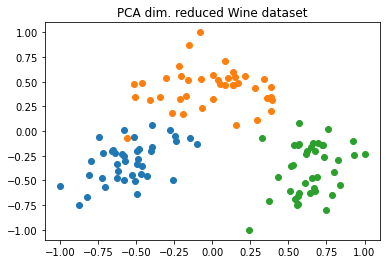

{'A': 0, 'B': 1, 'C': 2}
'testing_accuracy' : 0.9
'test_success_ratio' : 0.9
'predicted_labels' : [0 0 1 1 1 2 2 0 2 2]
'predicted_classes' : ['A', 'A', 'B', 'B', 'B', 'C', 'C', 'A', 'C', 'C']
ground truth: [0 0 1 1 1 2 2 2 2 2]
prediction:   [0 0 1 1 1 2 2 0 2 2]


In [7]:

import numpy as np
from qiskit.ml.datasets import wine
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance, aqua_globals
#from qiskit.aqua.components.feature_maps import SecondOrderExpansion
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.components.multiclass_extensions import AllPairs
from qiskit.aqua.utils.dataset_helper import get_feature_dimension
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua.algorithms.amplitude_estimators.q_factory import QFactory

from qiskit import IBMQ

n = 2  # dimension of each data point
IBMQ.load_account()

sample_Total, training_input, test_input, class_labels = wine(
    training_size=40,
    test_size=10, n=n, plot_data=True
)
datapoints, class_to_label = split_dataset_to_data_and_labels(test_input)
print(class_to_label)

temp = [test_input[k] for k in test_input]
total_array = np.concatenate(temp)

aqua_globals.random_seed = 10598

backend = BasicAer.get_backend('qasm_simulator')
feature_map = ZZFeatureMap(feature_dimension=get_feature_dimension(training_input))
svm = QSVM(feature_map, training_input, test_input, total_array,
          multiclass_extension=AllPairs())
quantum_instance = QuantumInstance(backend, shots=1024,
                                    seed_simulator=aqua_globals.random_seed,
                                    seed_transpiler=aqua_globals.random_seed)

result = svm.run(quantum_instance)
for k,v in result.items():
    print("'{}' : {}".format(k, v))
    
predicted_labels = svm.predict(datapoints[0])

predicted_classes = map_label_to_class_name(predicted_labels, svm.label_to_class)
print("ground truth: {}".format(datapoints[1]))
print("prediction:   {}".format(predicted_labels))
